In [115]:
import numpy as np  
import matplotlib.pyplot as plt 
import matplotlib.style 
import matplotlib as mpl 

Text(0, 0.5, 'y(x)')

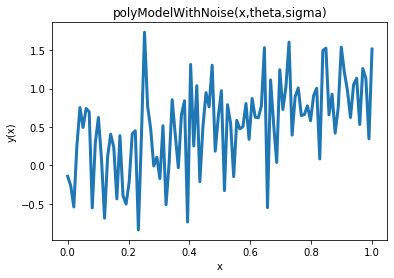

In [116]:
#Defining polyModelWithNoise function:

def polyModelWithNoise(x,theta,sigma):
    y=np.zeros((len(x),1))
    noise=np.random.normal(0,sigma,len(y))
    for i in range(len(x)):
        for j in range(len(theta)):
            y[i]+=theta[j]*(x[i]**j)
        y[i]+=noise[i]
    return y

#Defining the parameters

x=np.linspace(0,1,100)
theta=[0,1]
sigma=0.5

#Plotting:

fig, ax = plt.subplots()  
ax.plot(x,polyModelWithNoise(x,theta,sigma),linewidth=3)
ax.set_xlabel("x")
ax.set_title("polyModelWithNoise(x,theta,sigma)")
ax.set_ylabel("y(x)")

In [117]:
#Defining polyGradient function

def polyGradient(x,theta):
    z=np.zeros((len(theta),len(x)))
    for i in range(len(theta)):
        for j in range(len(x)):
            z[i,j]=x[j]**i
    return z
   
    

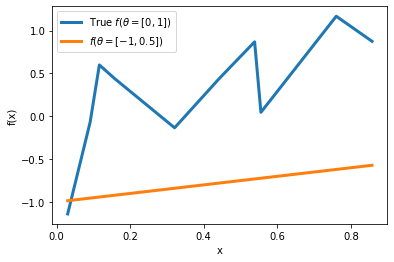

In [118]:
theta_true=[0,1]
sigma_true=0.5

def true_f(x,theta_true,sigma_true):
    return polyModelWithNoise(x,theta_true,sigma_true)

def polyModelWithoutNoise(x,theta):
    y=np.zeros((len(x),1))
    for i in range(len(x)):
        for j in range(len(theta)):
            y[i]+=theta[j]*(x[i]**j)
    return y

def get_avg_fake_chisq(x,theta):
    return np.average((polyModelWithoutNoise(x,theta)-true_f(x,theta_true,sigma_true))**2)

theta=[-1,0.5]
x=np.random.uniform(size=10)
x=np.sort(x)

fig, ax = plt.subplots() 
ax.plot(x,true_f(x,theta_true,sigma_true),linewidth=3,label=r"True $f(\theta=[0,1])$")
ax.plot(x,polyModelWithoutNoise(x,theta),linewidth=3,label=r'$f(\theta=[-1,0.5])$')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()


In [119]:
numSteps=100 #Number of steps for minimisation
theta=[-1,0.5] #Start place
eta=0.5 #'Learning' rate
chiSqArray=np.zeros(numSteps)  #Array for plotting
thetaArray=np.zeros((numSteps+1,len(theta)))  #Array for plotting 
thetaArray[0]=theta


for i in range(numSteps):
    chiSq=get_avg_fake_chisq(x,theta)
    chiSqArray[i]=chiSq 
    #Work out difference to true function
    deviation=polyModelWithoutNoise(x,theta)-true_f(x,theta_true,sigma_true)
    deviation=np.reshape(deviation,(10,))
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta



Text(0.5, 1.0, 'Fitting 1st order polynomial (with noise) with 1st order polynomial')

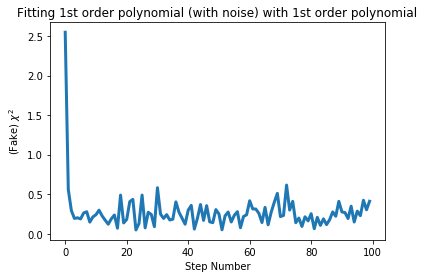

In [120]:
#Plotting:

fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Fitting 1st order polynomial (with noise) with 1st order polynomial')

Text(0.5, 1.0, 'Fitting 3rd order polynomial (with noise) with 1st order polynomial')

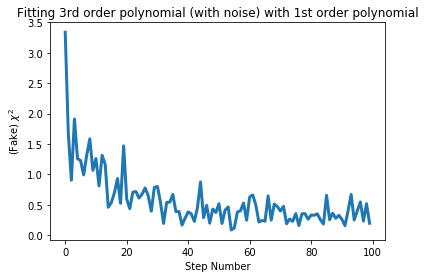

In [121]:
theta_true=np.array([0,1,2,2])
sigma_true=0.5


#fitting with 1st order polynomial

numSteps=100 #Number of steps for minimisation
theta=[0,-0.5] #Start place
eta=0.5 #'Learning' rate
chiSqArray=np.zeros(numSteps)  #Array for plotting
thetaArray=np.zeros((numSteps+1,len(theta)))  #Array for plotting 
thetaArray[0]=theta

for i in range(numSteps):
    chiSq=get_avg_fake_chisq(x,theta)
    chiSqArray[i]=chiSq 
    #Work out difference to true function
    deviation=polyModelWithoutNoise(x,theta)-true_f(x,theta_true,sigma_true)
    deviation=np.reshape(deviation,(10,))
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta

first_order_fit_final_theta=thetaArray[-1]
 
#Plotting:

fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Fitting 3rd order polynomial (with noise) with 1st order polynomial')

Text(0.5, 1.0, 'Fitting 3rd order polynomial (with noise) with 3st order polynomial')

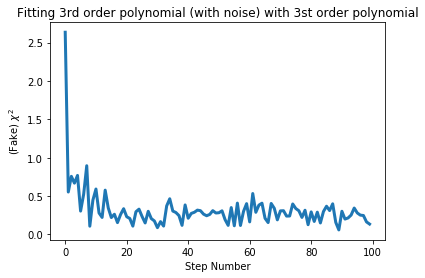

In [122]:
#fitting with 3rd order polynomial

numSteps=100 #Number of steps for minimisation
theta=[0,-0.5,1,0.5] #Start place
eta=0.5 #'Learning' rate
chiSqArray=np.zeros(numSteps)  #Array for plotting
thetaArray=np.zeros((numSteps+1,len(theta)))  #Array for plotting 
thetaArray[0]=theta

for i in range(numSteps):
    chiSq=get_avg_fake_chisq(x,theta)
    chiSqArray[i]=chiSq 
    #Work out difference to true function
    deviation=polyModelWithoutNoise(x,theta)-true_f(x,theta_true,sigma_true)
    deviation=np.reshape(deviation,(10,))
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta
    
third_order_fit_final_theta=thetaArray[-1]

#Plotting:

fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Fitting 3rd order polynomial (with noise) with 3st order polynomial')

Text(0.5, 1.0, 'Fitting 3rd order polynomial (with noise) with 7th order polynomial')

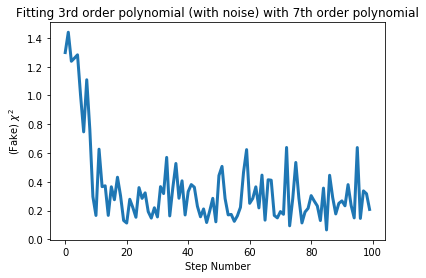

In [123]:
#fitting with 7th order polynomial

numSteps=100 #Number of steps for minimisation
theta=[1,0,0.3,0.2,-0.5,1,-1,0.1] #Start place
eta=0.5 #'Learning' rate
chiSqArray=np.zeros(numSteps)  #Array for plotting
thetaArray=np.zeros((numSteps+1,len(theta)))  #Array for plotting 
thetaArray[0]=theta

for i in range(numSteps):
    chiSq=get_avg_fake_chisq(x,theta)
    chiSqArray[i]=chiSq 
    #Work out difference to true function
    deviation=polyModelWithoutNoise(x,theta)-true_f(x,theta_true,sigma_true)
    deviation=np.reshape(deviation,(10,))
    #Now work out where do go next
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta

seventh_order_fit_final_theta=thetaArray[-1]  
    
#Plotting:

fig, ax = plt.subplots() 
count=np.arange(numSteps+1)  
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_xlabel("Step Number")
ax.set_ylabel(r"(Fake) $\chi^2$")
ax.set_title('Fitting 3rd order polynomial (with noise) with 7th order polynomial')

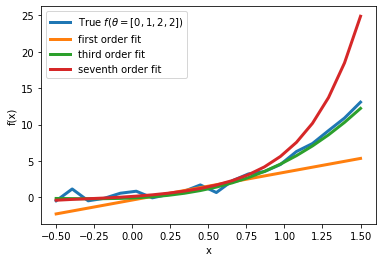

In [135]:
fig, ax = plt.subplots()
x=np.linspace(-0.5,1.5,20)
ax.plot(x,true_f(x,theta_true,sigma_true),linewidth=3,label=r"True $f(\theta=[0,1,2,2])$")
ax.plot(x,polyModelWithoutNoise(x,first_order_fit_final_theta),linewidth=3,label=r'first order fit')
ax.plot(x,polyModelWithoutNoise(x,third_order_fit_final_theta),linewidth=3,label=r'third order fit')
ax.plot(x,polyModelWithoutNoise(x,seventh_order_fit_final_theta),linewidth=3,label=r'seventh order fit')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()

The model partially generalises to the regions of x over which it wasn't trained. The 'fit' in this region (<0 and >1) looks particularly good for the third order polynomial, since this matches the order of the polynomial from which the actual data is calculated, so in general the third order approximation is the best at fitting the data outside the training region. It can be seen that the first and seventh order approximations do not fit the data very well for values of x larger than 1 and less than zero, and this is logical, since their parameters should not be 'tuned' to fit the data for values of x that fall outside the training region [0,1] 